# OpenCV Tutorial
Full course on  freeCodeCamp: [Open CV Tutorial- Develop Computer Vision Apps in the Cloud with Python](https://www.youtube.com/watch?v=iXNsAYOTzgM&list=WL)

## PART 1: OpenCV Basics

In [216]:
def imshow(image, gray=False):
    if gray:
        plt.imshow(image, cmap="gray")
    else:    
        plt.imshow(image[:,:,::-1])
    plt.xticks([]),plt.yticks([])

### Lesson 1: Changing Image's Color Profile

In [200]:
import cv2
from matplotlib import pyplot as plt

image= cv2.imread("img/color.jpg")

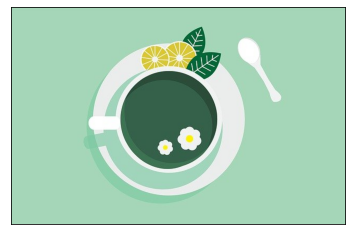

In [201]:
imshow(image)

In [202]:
# Get image dimensions
image.shape

(416, 640, 3)

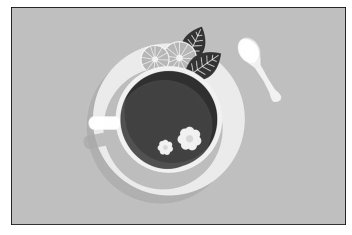

In [217]:
# Making image grayscale
image_gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow(image_gray, True)

#### HSV Image
HSV- Hue Saturation Variance.
Capable of holding all the color profiles under one channel (Channel H).
E.g. Color yellow: rgb= (255,255,0); hsv: (60,100,100).

In [205]:
image_hsv= cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_hsv.shape

(416, 640, 3)

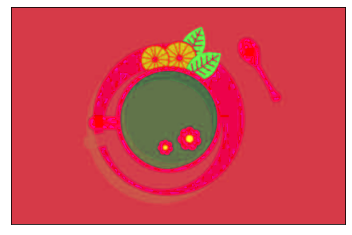

In [206]:
imshow(image_hsv)


### Lesson 2: Edge Detection

Canny Edge Detector
- Works on grayscale image (single channel image)

In [207]:
# Filter size
filter= (150,200)
img_canny= cv2.Canny(image_gray, *filter)

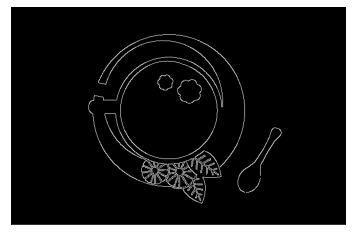

In [208]:
imshow(img_canny, True)

In [66]:
import numpy as np

Erosion & Dilation

Erosion: Reduce edge noise level  
Dilation: Emphasize edges

In [209]:
# Erosion
# Window size
kernel= np.ones((1,1), np.uint8)
img_erode= cv2.erode(img_canny, kernel, iterations=1)

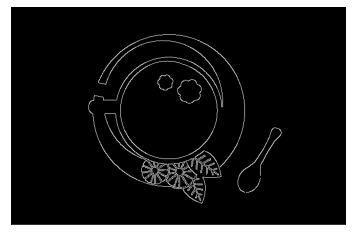

In [210]:
imshow(img_erode, True)

In [34]:
# Dilation
# Window size
kernel= np.ones((5,5), np.uint8)
img_dilate= cv2.dilate(img_canny, kernel, iterations=1)

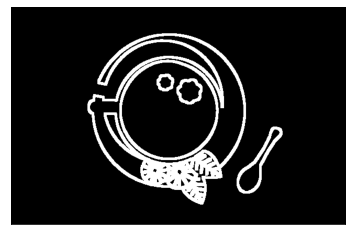

In [211]:
imshow(img_dilate, True)

In [212]:
# Erosion after dilation
kernel= np.ones((3,3), np.uint8)
img_erode= cv2.erode(img_dilate, kernel, iterations=1)

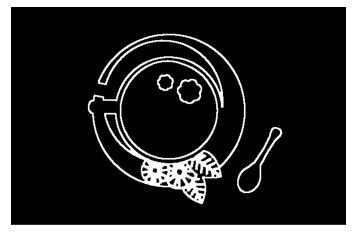

In [213]:
imshow(img_erode, True)

**Caveat**: Horizontally stack images using Numpy

In [214]:
disp_hor= np.hstack((img_canny, img_dilate, img_erode))

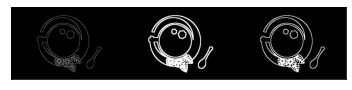

In [215]:
imshow(disp_hor, True)

### Lesson 3: Image Manipulation

In [218]:
cat= cv2.imread("img/cat.jpg")

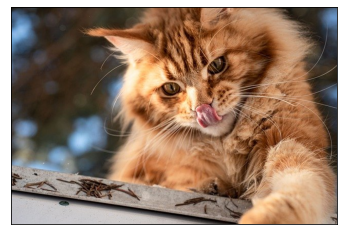

In [219]:
imshow(cat)

In [220]:
cat_gray= cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)

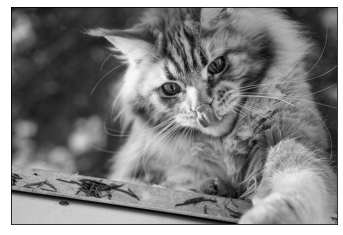

In [221]:
imshow(cat_gray, True)

Denoising: Reduce image noise to a large extent

In [222]:
cat_denoised= cv2.fastNlMeansDenoising(cat_gray, None, 20, 20, 15)

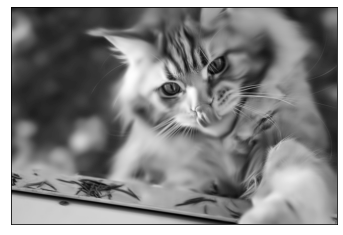

In [223]:
imshow(cat_denoised, True)

In [224]:
disp_hor= np.hstack((cat_gray,cat_denoised))

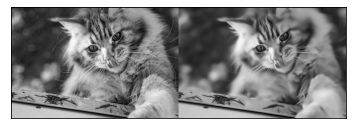

In [225]:
imshow(disp_hor, True)

### Lesson 4: Drwaing Shapes and Writing Text on Images

In [226]:
# Create blank 3 channel image og pitch black
img= np.zeros((512,512,3), np.uint8) 

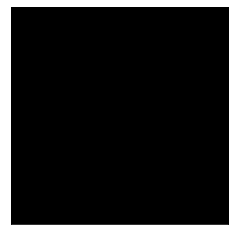

In [227]:
imshow(img)

Drawing Functions

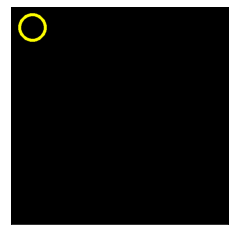

In [228]:
# Draw circle
cv2.circle(img, center=(50,50), radius=30, color=(0,255,255), thickness=5)
imshow(img)

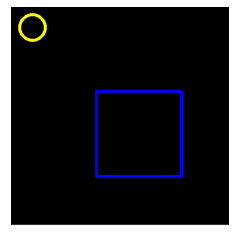

In [229]:
# Draw rectangle between top left point and bottom right point
top_left= (200,200)
bot_right= (400,400)
cv2.rectangle(img, top_left, bot_right, color=(255,0,0), thickness=5)
imshow(img)

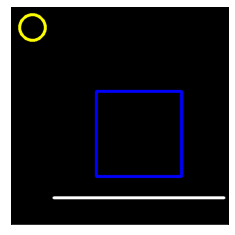

In [230]:
# Draw line between 2 point
pnt1= (100,450)
pnt2= (500,450)
cv2.line(img, pnt1, pnt2, color=(255,255,255), thickness=5)
imshow(img)

Write Text on Image

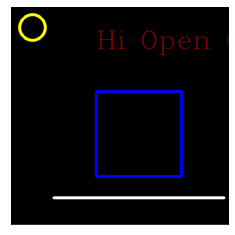

In [231]:
# Write text
cv2.putText(img, text="Hi Open CV", org=(200,100), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=2, color=(0,0,255))
imshow(img)

### Exercise 1: Color Detection

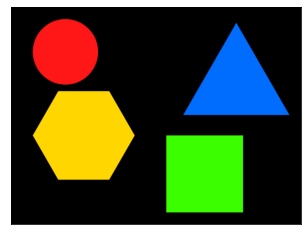

In [232]:
shapes= cv2.imread("img/shapes.png")
imshow(shapes)

BGR Image- Blue Green Red  
HSV Image- Hue Saturation Variance

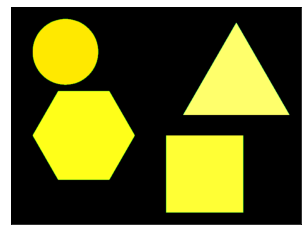

In [233]:
shapes_hsv= cv2.cvtColor(shapes, cv2.COLOR_BGR2HSV)
imshow(shapes_hsv)

Isolate Colors:   
OpenCV's Trackbar can be used to get color values: 
```
Blue color HSV range: (65,0,0)-(110,255,255)  
Red color HSV range: (0,0,0)-(20,255,255)  
Green color HSV range: (46,0,0)-(91,255,255)  
```

In [234]:
# Define blue color
lower_blue= np.array([65,0,0])
upper_blue= np.array([110,255,255])

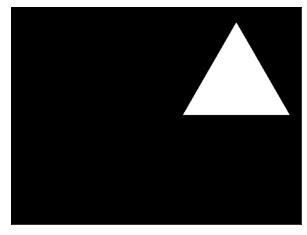

In [236]:
# Create blue color mask
blue_mask= cv2.inRange(shapes_hsv, lower_blue, upper_blue)
imshow(blue_mask, True)

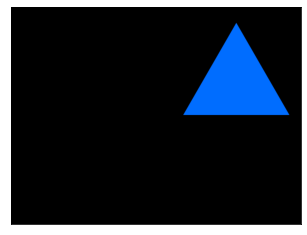

In [237]:
# Isolate blue color
shapes_blue= cv2.bitwise_and(shapes, shapes, mask=blue_mask)
imshow(shapes_blue)

### Exercie 2: Face Detection

In [242]:
face_cascade= cv2.CascadeClassifier("files/haarcascade_frontalface_default.xml")

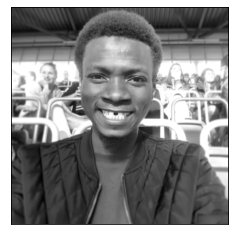

In [251]:
pic= cv2.imread("img/pic.jpg")
pic_gray= cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
imshow(pic_gray, True)

In [252]:
faces= face_cascade.detectMultiScale(pic_gray, 2, 1)

In [253]:
faces

array([[ 576,  352,  768,  768],
       [ 232,  540,  192,  192],
       [1784,  586,   96,   96]], dtype=int32)

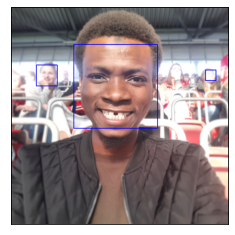

In [257]:
# Draw bounding boxes for identified faces
for (x,y,w,h) in faces:
    cv2.rectangle(pic, (x,y), (x+w,y+h), (255,0,0), 5)

imshow(pic)

### Lesson 3: Shape Detection

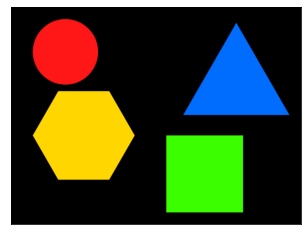

In [304]:
shapes= cv2.imread("img/shapes.png")
imshow(shapes)

In [305]:
shapes_gray= cv2.cvtColor(shapes, cv2.COLOR_BGR2GRAY)

Thresholding: Convert inetrest points into black and everything else white. Essentially making the image into a binary image.

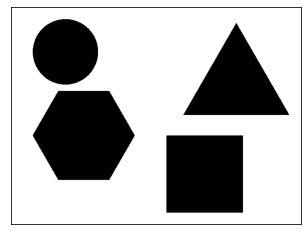

In [306]:
# Thresholding
ret, shapes_thres= cv2.threshold(shapes_gray, 50, 255, 1)
imshow(shapes_thres, True)

Locate contours

In [307]:
contours, h= cv2.findContours(shapes_thres,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

Approximate number of points required to define shape using Douglas-Peucker algorithm

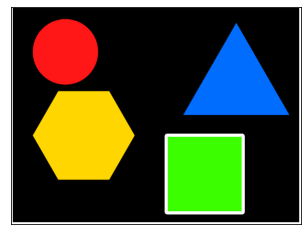

In [308]:
for cnt in contours:
    eps= 0.01*cv2.arcLength(cnt, True)
    # Get approximate curve
    approx= cv2.approxPolyDP(cnt, eps, closed=True)
    # Number of points that define approximate curve
    n= len(approx)
    # Hex
    # if n==6:
    # Triangle
    # if n==3:
    # Circle
    # if n>6:
    # Square
    if n==4:
        cv2.drawContours(shapes, [cnt], 0, (255,255,255), 5)

imshow(shapes)

### Project 1: Ball Tracking

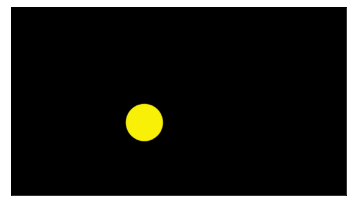

In [361]:
# Load video file
cap= cv2.VideoCapture("img/video.mp4")

# Read a frame
ret, frame= cap.read()
imshow(frame)

In [362]:
# Track motion
ball_motion= []
# Output video file
out= cv2.VideoWriter("img/out.avi", cv2.VideoWriter_fourcc("M", "J", "P", "G"),10,(1920,1080))

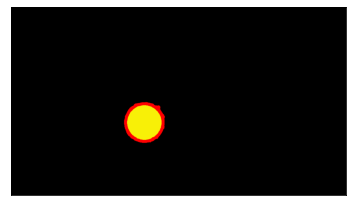

In [363]:
# Detect Color
frame_hsv= cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
# Create yellow color mask
yellow_mask= cv2.inRange(frame_hsv, np.array([21,0,0]), np.array([45,255,255]))
# Find contours
contours, _= cv2.findContours(yellow_mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    cv2.drawContours(frame, [cnt], 0, (0,0,255), 15)
imshow(frame)

In [364]:
# Read multiple frame
while cap.isOpened():
    ret, frame= cap.read()
    if not ret:
        break
    # Detect Color
    frame_hsv= cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # Create yellow color mask
    yellow_mask= cv2.inRange(frame_hsv, np.array([21,0,0]), np.array([45,255,255]))
    # Isolate yellow color
    frame_yellow= cv2.bitwise_and(frame, frame, mask=yellow_mask)
    # Find contours
    contours, _= cv2.findContours(yellow_mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) > 0:
        # Find contour with maximum area
        cnt_max= max(contours, key=cv2.contourArea)
        # Find minimum circle that encloses contour and find its center and radius
        ((x,y), radius)= cv2.minEnclosingCircle(cnt_max)
        center= (int(x),int(y))
        # Find moments
        # M= cv2.moments(cnt_max)
        # Draw ball center
        cv2.circle(frame, center, 5, (255,0,0), -1)
        ball_motion.append(center)
    # Draw ball motion
    if len(ball_motion)>2:
        for idx,val in enumerate(ball_motion):
            cv2.line(frame, ball_motion[idx-1], ball_motion[idx], (0,0,255), 5)
    out.write(frame)
out.release()